In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
mnist = pickle.Unpickler(open('mnist.pkl', 'rb'), encoding = 'latin1').load()

(train, validation, test) = mnist
(train_images, train_labels) = train
(validation_images, validation_labels) = validation
(test_images, test_labels) = test

image_size = 28
features_size = 784
classes_count = 10

print(train_images.shape)
print(validation_images.shape)
print(test_images.shape)

(50000, 784)
(10000, 784)
(10000, 784)


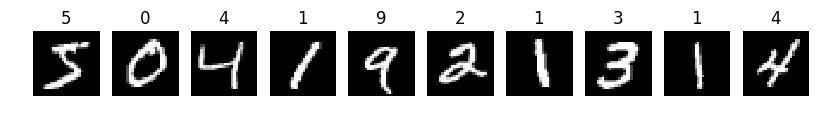

In [3]:
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.title(str(train_labels[i]))
    plt.imshow(train_images[i].reshape((image_size, image_size)))
    plt.axis('off')

epoch 0: accuracy = 0.105000, loss = 2.319211
epoch 200: accuracy = 0.880000, loss = 1.060192
epoch 400: accuracy = 0.830000, loss = 1.178301
epoch 600: accuracy = 0.825000, loss = 1.179907
epoch 800: accuracy = 0.865000, loss = 1.084481
epoch 1000: accuracy = 0.870000, loss = 1.134875
epoch 1200: accuracy = 0.895000, loss = 1.098704
epoch 1400: accuracy = 0.830000, loss = 1.170266
epoch 1600: accuracy = 0.875000, loss = 1.106152
epoch 1800: accuracy = 0.905000, loss = 1.069458


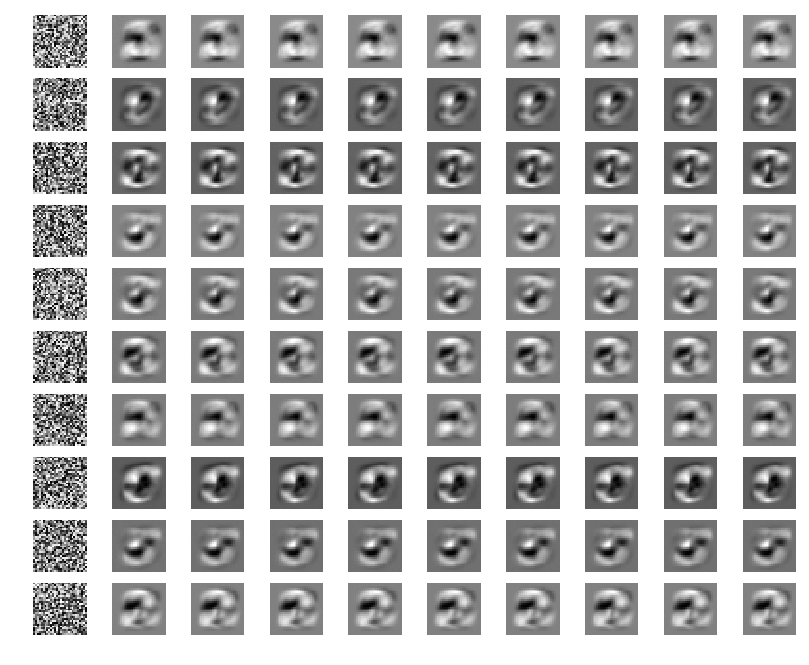

In [4]:
hidden_neurons = 400
minibatch_size = 200
regularization_factor = 0.05
learning_rate = 0.5
learning_rate_decay = 0.99

# 1 relu layers, 1 output softmax layer
# it's actually stemmed 4 layers network hence strange names of variables

W3 = np.random.uniform(high = 1.0 / hidden_neurons, size = (features_size, hidden_neurons))
b3 = np.zeros(shape = (hidden_neurons,))
W4 = np.random.uniform(high = 1.0 / hidden_neurons, size = (hidden_neurons, classes_count))
b4 = np.zeros(shape = (classes_count,))

learning_history = []

for epoch in range(2000):
    choice = np.random.choice(train_images.shape[0], minibatch_size)
    X = train_images[choice]
    y = train_labels[choice]
    
    # forward pass
    H2 = X
    H3 = np.maximum(np.dot(H2, W3) + b3, 0)
    H4 = np.dot(H3, W4) + b4

    scores = H4 - np.max(H4, axis = 1, keepdims = True)
    probs = np.exp(scores)
    probs /= np.sum(probs, axis = 1, keepdims = True)
    labels = np.argmax(probs, axis = 1)

    accuracy = np.mean(labels == y)    

    loss = np.sum(-np.log(probs[range(minibatch_size), y])) / minibatch_size
    loss += 0.5 * regularization_factor * (np.sum(W3 * W3) + np.sum(b3 * b3))
    loss += 0.5 * regularization_factor * (np.sum(W4 * W4) + np.sum(b4 * b4))
    
    learning_history.append((accuracy, loss))
        
    if epoch % 200 == 0:
        print('epoch %d: accuracy = %f, loss = %f' % (epoch, accuracy, loss))
        
        for i in range(10):
            plt.subplot(10, 10, epoch / 200 + i * 10 + 1)
            plt.imshow(W3[:, i * 20].reshape(image_size, image_size))
            plt.axis('off')
            
    # backprop
    # layer 4
    dL_dH4 = np.array(probs)
    dL_dH4[range(minibatch_size), y] -= 1
    dL_dH4 /= minibatch_size

    dH4_dW4 = np.array(H3)

    dL_dW4 = np.dot(dH4_dW4.T, dL_dH4)
    dL_dW4 += regularization_factor * W4
    dL_db4 = np.sum(dL_dH4, axis = 0)
    dL_db4 += regularization_factor * b4
    
    # layer 3
    dH3_dW3 = np.array(H2)
    dH3_db3 = np.ones(shape = H2.shape[0])  
    
    dH4_dH3 = np.array(W4)
    
    dL_dH3 = np.dot(dL_dH4, dH4_dH3.T)
    dL_dH3[H3 <= 0] = 0
    
    dL_dW3 = np.dot(dH3_dW3.T, dL_dH3)
    dL_dW3 += regularization_factor * W3
    dL_db3 = np.dot(dH3_db3.T, dL_dH3)
    dL_db3 += regularization_factor * b3
    
    W4 += - learning_rate * dL_dW4
    b4 += - learning_rate * dL_db4
    W3 += - learning_rate * dL_dW3
    b3 += - learning_rate * dL_db3
    
    learning_rate *= learning_rate_decay


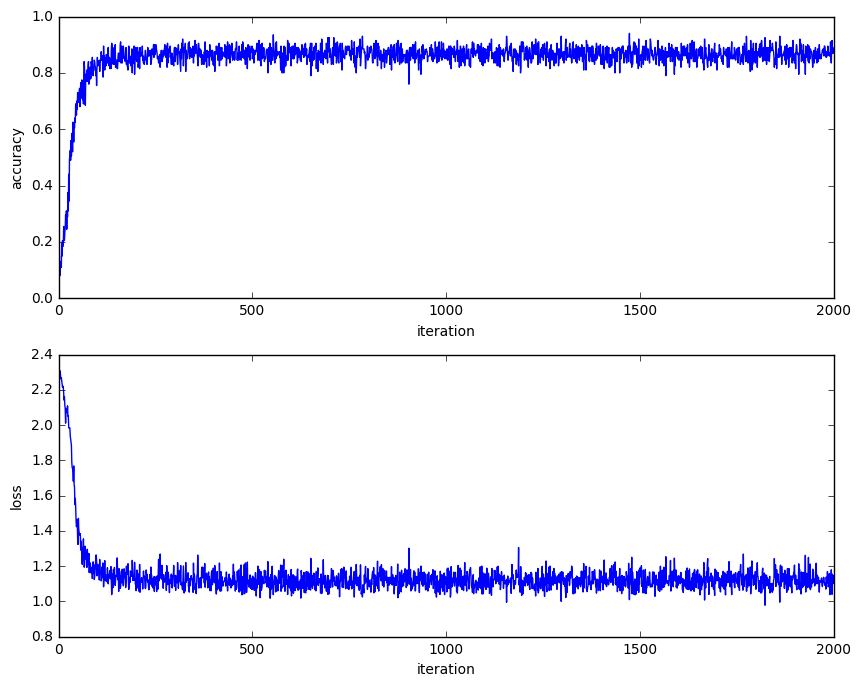

In [5]:
plt.subplot(2, 1, 1)
plt.plot([x[0] for x in learning_history])
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.subplot(2, 1, 2)
plt.plot([x[1] for x in learning_history])
plt.xlabel('iteration')
plt.ylabel('loss')

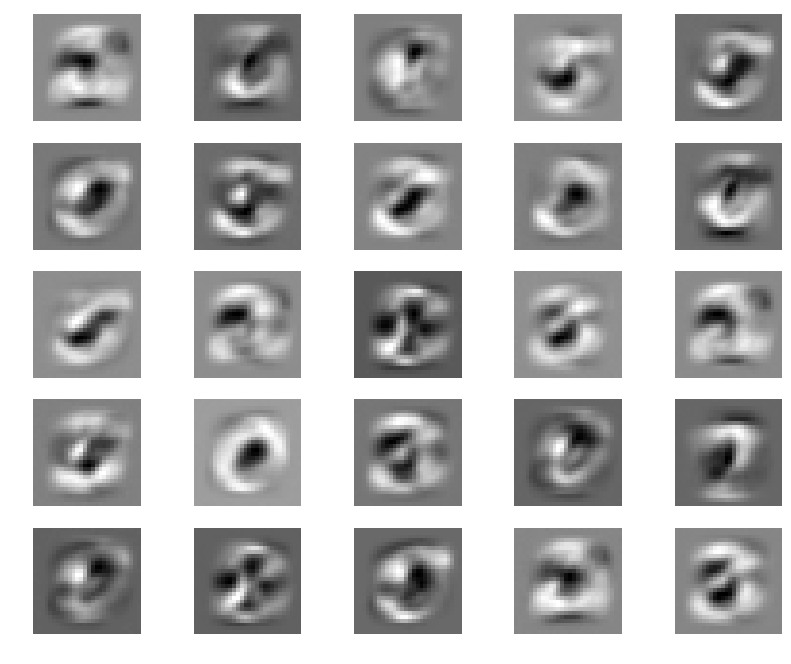

In [6]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(W3[:, i].reshape(image_size, image_size))
    plt.axis('off')

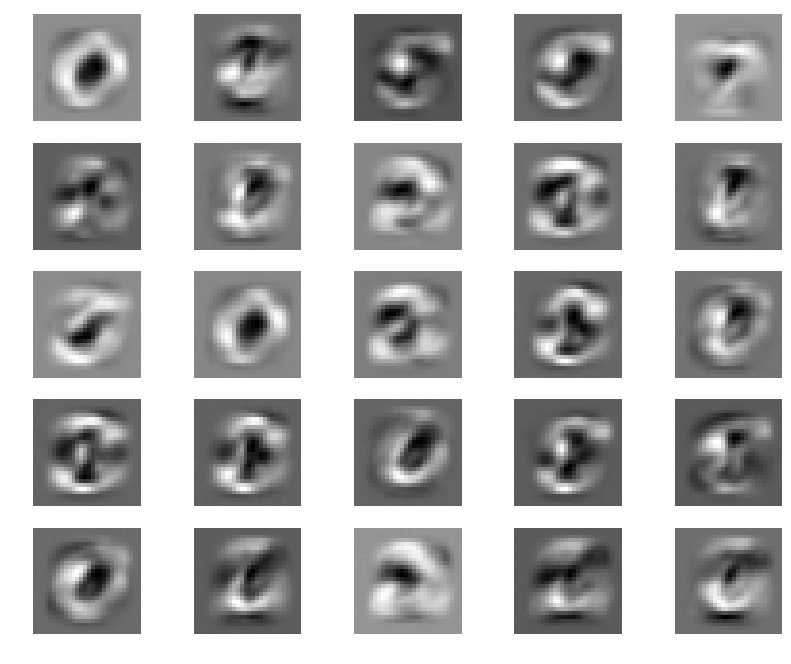

In [7]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(W3[:, i + 25].reshape(image_size, image_size))
    plt.axis('off')